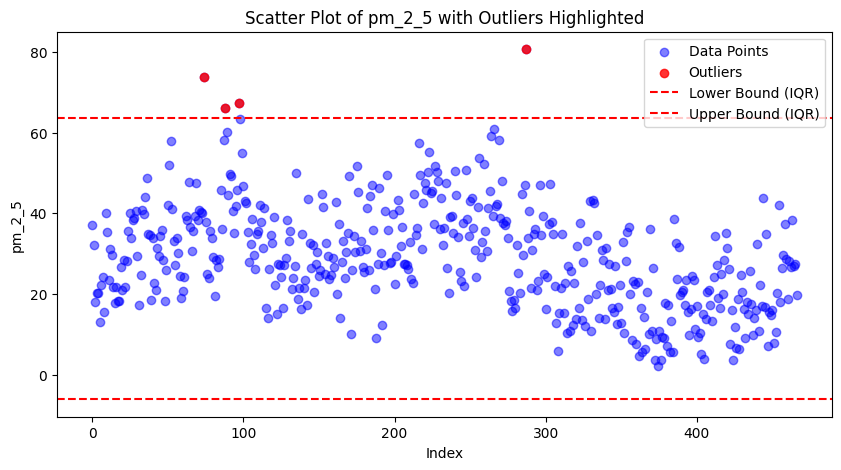

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# กำหนด path ของไฟล์ CSV (แทนที่ด้วยไฟล์ของปอนด์)
file_path = r"C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\export-aerosure_wifi_m-1d.csv"

# อ่านข้อมูล
df = pd.read_csv(file_path)

# เลือกคอลัมน์ที่ต้องการเช็ค Outliers (เปลี่ยนเป็นคอลัมน์ที่ต้องการ)
col = "pm_2_5"  # เปลี่ยนเป็นชื่อคอลัมน์ที่ต้องการวิเคราะห์

# ตรวจสอบว่าคอลัมน์มีอยู่ใน DataFrame หรือไม่
if col in df.columns:
    # คำนวณ IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # กำหนดขอบเขต Outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # ค้นหาค่า Outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Plot แสดงข้อมูลเป็นจุด (scatter plot) โดยให้ Y เป็น index
    plt.figure(figsize=(10, 5))
    plt.scatter(df.index, df[col], label="Data Points", color="blue", alpha=0.5)
    plt.scatter(outliers.index, outliers[col], label="Outliers", color="red", alpha=0.8)
    
    # เส้นบอกขีดจำกัดของ Outliers
    plt.axhline(lower_bound, color="red", linestyle="dashed", label="Lower Bound (IQR)")
    plt.axhline(upper_bound, color="red", linestyle="dashed", label="Upper Bound (IQR)")
    
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.title(f"Scatter Plot of {col} with Outliers Highlighted")
    plt.legend()
    plt.show()
else:
    print(f"❌ คอลัมน์ '{col}' ไม่พบใน DataFrame")
